In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calmap

In [2]:
%matplotlib inline

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## yearplot参数说明
只显示一年的数据。

```python
def yearplot(data, year=None, how='sum', vmin=None, vmax=None, cmap='Reds',
             fillcolor='whitesmoke', linewidth=1, linecolor=None,
             daylabels=calendar.day_abbr[:], dayticks=True,
             monthlabels=calendar.month_abbr[1:], monthticks=True, ax=None,
             **kwargs):
```

calmap源代码总共也就没几行代码，完全可以去看源代码，看看各个参数是什么意思。


data：一个Series，要求索引必须是DatetimeIndex。

year=None：画哪一年的图，默认是最早日期的年份(`data.index.sort_values()[0].year`)，会对数据就行过滤。

how='sum'：重采样的方式(`data.resample('D').agg(how)`)，默认就是`data.resample('D').sum()`，如果设置为None，一定要确保一定按照天重采样过。

vmin, vmax :就是画热力图的最大最小值，如果不设置，会取数据的最大最小值。

cmap : matplotlib colormap name or object,The mapping from data values to color space.就是选择颜色。

fillcolor：Color to use for days without data，没有数据的地方填充的颜色。

daylabels：可以格式化星期几的轴，必须是长度为7的list。

monthlabels：可以格式化月份的轴，必须是长度为12的list。

其他的参数使用时可以看源码的注释。

## 测试

In [3]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

In [4]:
events.head()

2015-03-24    0.556570
2014-04-16    1.191865
2014-02-03   -0.352923
2014-03-12    0.804602
2015-12-11    1.105089
dtype: float64

In [5]:
events.describe()

count    500.000000
mean       0.092851
std        0.994906
min       -2.725735
25%       -0.520525
50%        0.109310
75%        0.733680
max        3.716546
dtype: float64

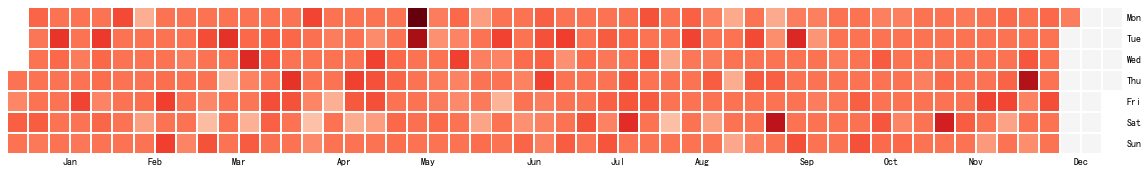

In [6]:
plt.figure(figsize=(20, 5))
calmap.yearplot(events, year=2015)

In [7]:
days.min(), days.max()

(numpy.datetime64('2014-01-16T00:00:00.000000000'),
 numpy.datetime64('2015-12-14T00:00:00.000000000'))

In [8]:
events["2015"].sort_index()[0:5]

2015-01-02   -0.592728
2015-01-03    0.601990
2015-01-05    0.048082
2015-01-05    0.386412
2015-01-06   -0.059706
dtype: float64

In [9]:
events["2015"].sort_index()[-5:]

2015-12-04   -0.464048
2015-12-06   -0.786760
2015-12-07    0.342526
2015-12-11    1.105089
2015-12-14   -0.319665
dtype: float64

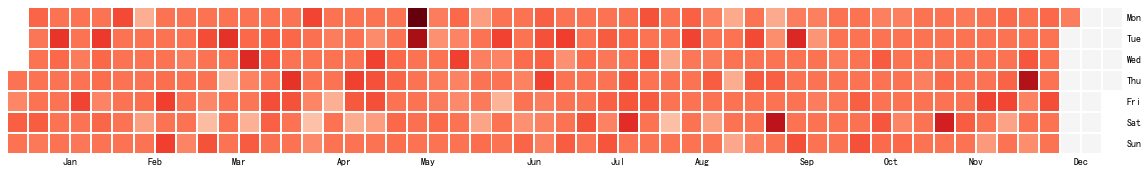

In [10]:
plt.figure(figsize=(20, 5))
calmap.yearplot(events, year=2015)

In [11]:
events["2015"].sort_values()[0:5]

2015-03-07   -2.550646
2015-02-09   -2.531227
2015-06-12   -2.235513
2015-08-24   -2.193903
2015-08-08   -2.180729
dtype: float64

In [12]:
events["2015"].sort_values()[-5:]

2015-05-12    2.284850
2015-09-15    2.307394
2015-05-11    2.414844
2015-11-07    2.777221
2015-12-03    3.716546
dtype: float64

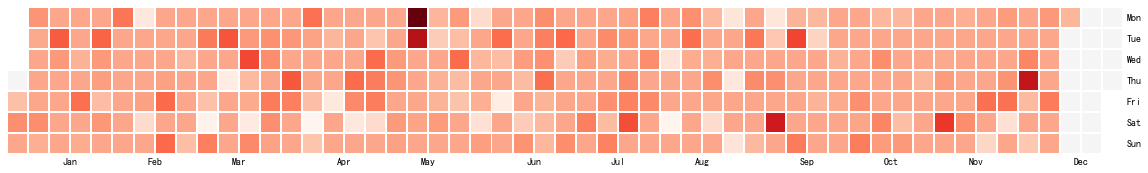

In [13]:
plt.figure(figsize=(20, 5))
calmap.yearplot(events["2015"])

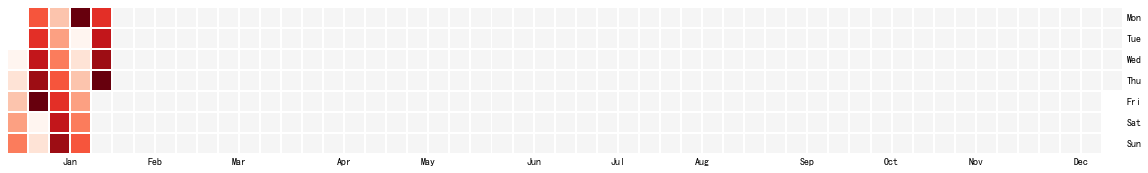

In [14]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 3, index=pd.date_range('2020-01-01', periods=10 * 3, freq='D') )
calmap.yearplot(data)

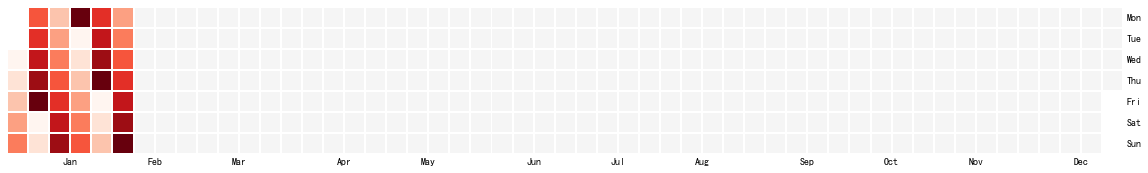

In [15]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 4, index=pd.date_range('2020-01-01', periods=10 * 4, freq='D') )
calmap.yearplot(data)

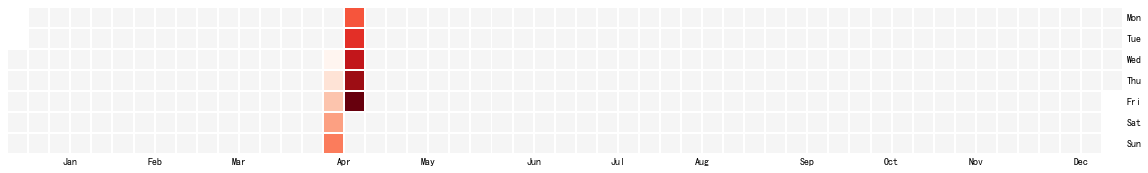

In [16]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 1, index=pd.date_range('2020-04-15', periods=10 * 1, freq='D') )
calmap.yearplot(data)

In [17]:
# 2020-04-15是星期三
pd.date_range('2020-04-15', periods=10 * 1, freq='D').dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4], dtype='int64')

In [18]:
# 这样看更明显
pd.date_range('2020-04-15', periods=10 * 1, freq='D').day_name()

Index(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')

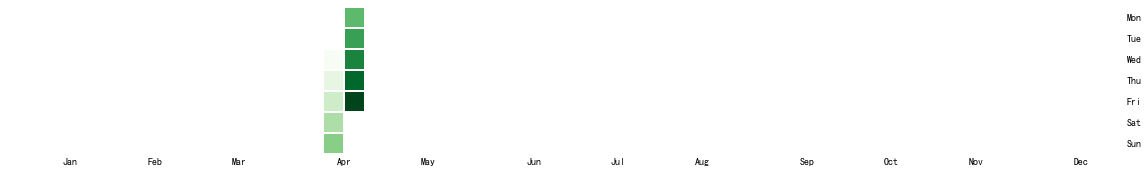

In [19]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 1, index=pd.date_range('2020-04-15', periods=10 * 1, freq='D') )
calmap.yearplot(data, fillcolor='white', cmap='Greens')

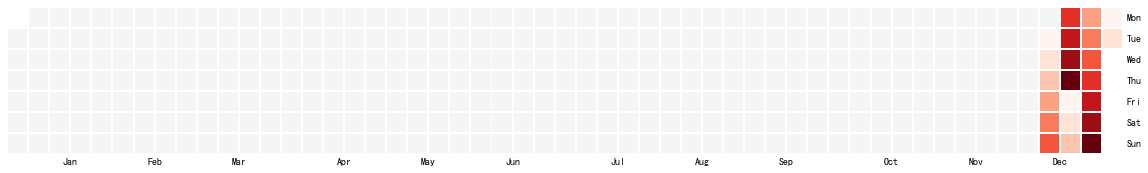

In [20]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 3, index=pd.date_range('2019-12-10', periods=10 * 3, freq='D') )
calmap.yearplot(data)

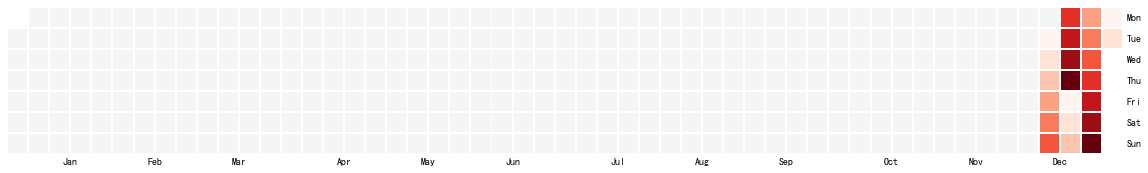

In [21]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 3, index=pd.date_range('2019-12-10', periods=10 * 3, freq='D') )
calmap.yearplot(data, year=2019)

In [22]:
data["2019"].size

22

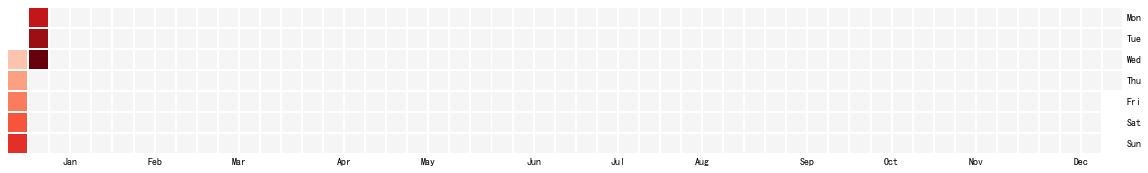

In [23]:
plt.figure(figsize=(20, 5))
data = pd.Series(list(range(1,11)) * 6, index=pd.date_range('2019-11-10', periods=10 * 6, freq='D') )
calmap.yearplot(data, year=2020)

In [24]:
data =  pd.concat([
    pd.Series(list(range(1,11)), index=pd.date_range('2019-06-10', periods=10, freq='D') ),
    pd.Series(list(range(1,11)), index=pd.date_range('2020-04-10', periods=10, freq='D') )
])
data

2019-06-10     1
2019-06-11     2
2019-06-12     3
2019-06-13     4
2019-06-14     5
2019-06-15     6
2019-06-16     7
2019-06-17     8
2019-06-18     9
2019-06-19    10
2020-04-10     1
2020-04-11     2
2020-04-12     3
2020-04-13     4
2020-04-14     5
2020-04-15     6
2020-04-16     7
2020-04-17     8
2020-04-18     9
2020-04-19    10
dtype: int64

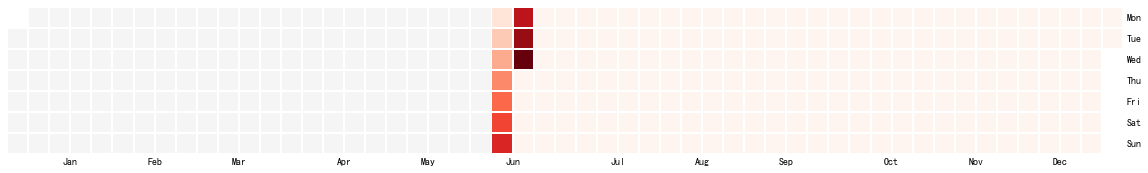

In [25]:
plt.figure(figsize=(20, 5))
calmap.yearplot(data)

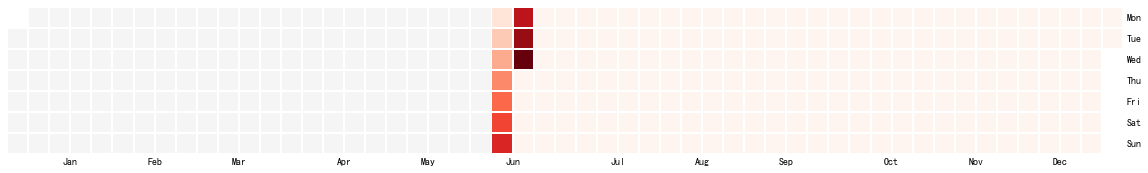

In [26]:
plt.figure(figsize=(20, 5))
calmap.yearplot(data, year=2019)

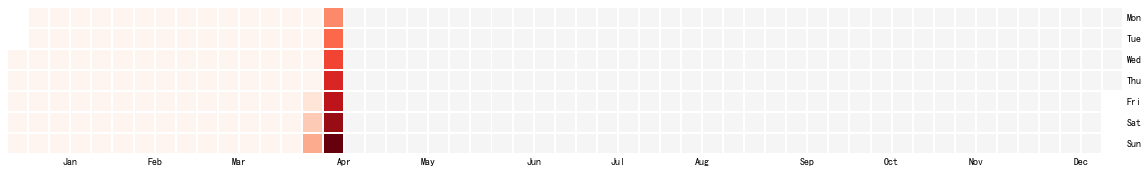

In [27]:
plt.figure(figsize=(20, 5))
calmap.yearplot(data, year=2020)

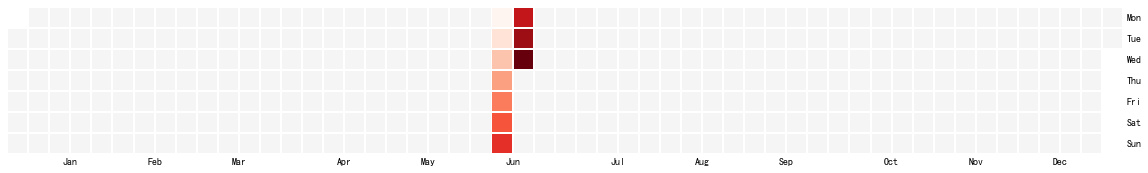

In [28]:
plt.figure(figsize=(20, 5))
calmap.yearplot(data["2019"])

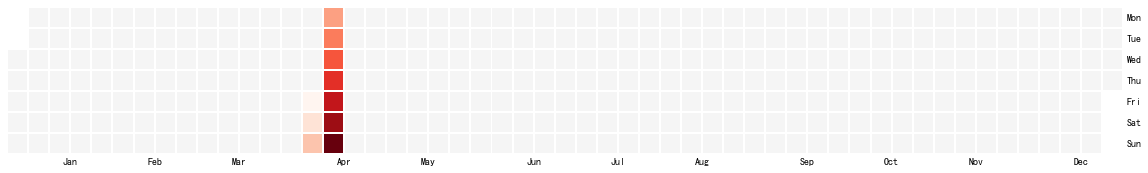

In [29]:
plt.figure(figsize=(20, 5))
calmap.yearplot(data["2020"])

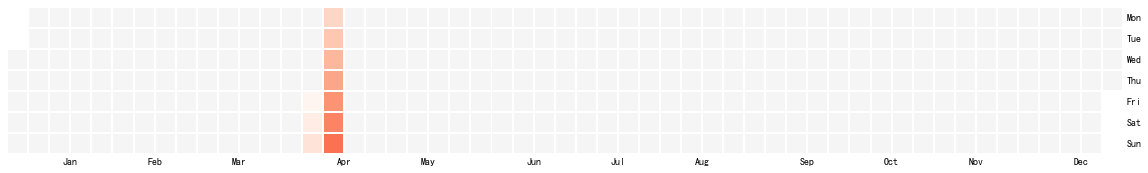

In [30]:
# vmin, vmax不指定的话就从数据中算出来。
plt.figure(figsize=(20, 5))
calmap.yearplot(data["2020"], vmax= 20)

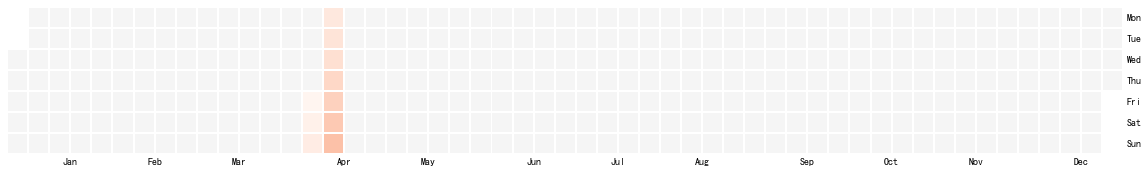

In [31]:
plt.figure(figsize=(20, 5))
calmap.yearplot(data["2020"], vmax= 40)

In [32]:
#data.resample('D').sum()

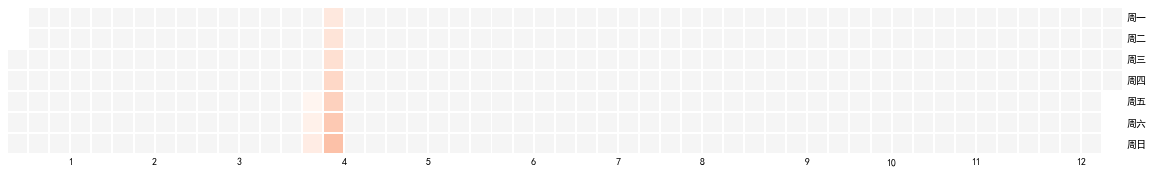

In [33]:
# 格式化轴
plt.figure(figsize=(20, 5))
calmap.yearplot(data["2020"], vmax= 40, daylabels=["周"+i for i in list("一二三四五六日")], 
                monthlabels=[i for i in range(1, 13)])

## calendarplot画所有的年份
calendarplot可以把数据中所有年份的数据都画出来。plt.subplots的命名参数通过fig_kws参数传递，需要传入map。

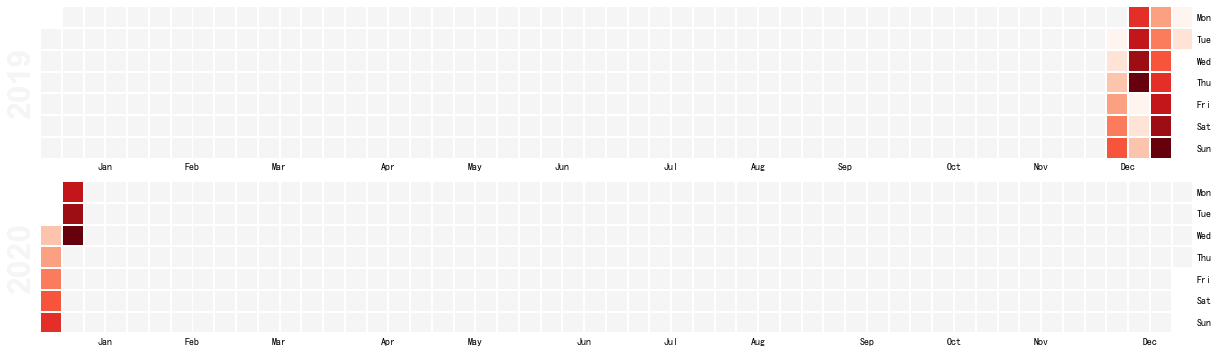

In [34]:
# 图片大小设置
data = pd.Series(list(range(1,11)) * 3, index=pd.date_range('2019-12-10', periods=10 * 3, freq='D') )
_ = calmap.calendarplot(data , fig_kws={"figsize":(40, 5)})